# **Artificial Intelligence Coursework 1**
by David Cardoso (dcard001) | November 2021








## Introduction

In this coursework I will build a succession of Neural Networks (NN) with TensorFlow (TF) and search for the best configuration of hyperparameters to achieve the best model through the implementation of the universal workflow of machine learning, as presented in the book Deep Learning with Python [1]. I will be using the Boston House Pricing dataset to try to predict the median price of homes in a specific Boston suburb from the mid-1970s.
First things first, Deep Learning (DL) is a new take on learning representations within Machine Learning (ML). DP allows computers to carry out classification, regression, and sequence prediction tasks with unprecedent accuracy levels. This is accomplished by it putting emphasis on learning successive layers of increasingly meaningful representations, with each layer learning by exposure to examples. This representations are learned via the use of NN. NN is a deep learning model made of a static sequence of computational layers stacked on top of each other. These layers extract “representations out of the data fed into them” [2].
NN are composed of three different layers: Input layer, Hidden layer and Output layer as shown in figure 1.

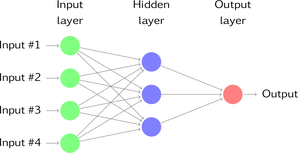

[Fig. 01] - Neural Network structure

Applications of DL can be found in a huge variety of industries. From automated driving to aerospace and medical research, DL is currently being used to decrease and prevent road accidents, locate areas of interest to drop troops, help researchers to identify cancer cells in very early stages, provide automated hearing and speech translation, among many other possible uses. Due to the ability to perform such tasks directly from images, text or sound, DL is revolutionizing our world in ways that we did not imagine.
With this coursework I intend to explore and expand my knowledge on deep learning models and therefore possibly contribute for a more efficient and advanced future.

---



## **Methodology**

###**Part 1: Defining the problem and assemblance of the dataset**
For this coursework, I will understand if and how a deep learning model can be built in order to predict the median price of homes in a given Boston suburb in the mid-1970s through the use of Boston Housing Price dataset. Such dataset contains endemic data points, at the time, for example nitric oxides concentration, average number of rooms per dwelling and pupil-teacher ratio by town, among other out of a total of 13 features. 

I will import the dataset, load the data and check the key attributes of the tensor. A tensor is a container for data, almost always for numbers. It is defined by three key attributes:
1.  Rank/dimension, the number of axes 
2.  Shape, the number of elements along each dimension
3.  Type, the data type of the contained data

In [ ]:
# Import and load dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
# A quick examination of the data
##  Check the tensor rank
print('Rank:', train_data.ndim)
##  Check the tensor shape
print('Train data shape:', train_data.shape)
print('Test data shape:', test_data.shape)
##  Check the tensor type
print('Data type:', train_data.dtype)

Rank: 2
Train data shape: (404, 13)
Test data shape: (102, 13)
Data type: float64


Through the analyse of the dataset, it is perceptible that this dataset has 506 samples, 404 of which are training samples and the remaining 102 test samples, with each block of samples with 13 numerical features. This may be considered a small amount of data points.

Due to this problem being finding only one answer among an infinite quantity of output, it is clear that this is a scalar regression problem, “a task where the target is a continuous scalar value” [2], a value that portrays the purposeful relationship between correlated variables, in this case the price of a property and its features. 

For this reason, I hypothesize that:

1.   The deep learning model can predict the median price of home at that location and time, given the existent data.
2.   The dataset has sufficient data and sufficient information so that the model will learn the relationship between input and output.

---


###**Part 2: Choosing a measure of success**

In order to measure the success of my model, I first need to address how to measure it. For being a regression problem, it has different metrics from other types of problems. Whereas accuracy is expected and desired for a classification model, in this case the aim is to achieve the lowest possible absolute value difference between predictions and targets. This is called mean absolute error (MAE) and it provides a good metric to measure the performance of this model. 

Since the measure of success is MAE, naturally the loss function will be mean square error (MSE) I will optimise the mean square error in the loss function.

---

###**Part 3: Deciding on an evaluation protocol**
Th third part of the universal workflow is to decide on how to evaluate my current progress. I have chosen K-fold cross validation. This protocol is particularly efficient when there are not enough samples to use hold-out validation set. Cross-validation is used to evaluate models with restricted data samples and works through the following steps:
1.	Shuffle the dataset randomly
2.	Split the dataset into k groups of equal size
3.	In each group
  
    a.	Use the group as test data set
    
    b.	Use the remaining groups as training data set
    
    c.	Fit a model on the training set and evaluate it on the test set
    
    d.	Keep the validation value 
4.	Sum the validation scores and divide by the number of k groups, determining the average of all validations scores and therefore find the final score. [5]

For this reasons, the value for k must be chosen carefully for it will hve implications on the bias of this technique. The lower the k value, the smaller the bias and the better the model will predict.

---


###**Part 4: Preparing the data**

In a neural network, a dataset can have a plethora of features with different values and ranges. Although manageable by the network, this would create unnecessary difficult to learn. So, to circumvent this, it is crucial to homogenise data. This is called normalization and is performed by Numpy. 

In [ ]:
# Normalization
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

With the data normalized and ready to be used by the network, the next natural step is to build the network.

---

###**Part 5: Better than a baseline**

The fifth part of the universal workflow dictates that a basic model must be built with statistical power capabilities. This basic model must be capable of performing better than a baseline, proving that its results escape the probability of randomly predict successfully. 
I will now create a baseline to be used as comparison to the basic model. This baseline will be the result of the mean absolute error (MAE), the absolute value difference between predictions and targets. In this case, such value refers to the MAE of the average house prices. 

This will be the baseline as shown in the code bellow:




In [ ]:
import numpy as np
mean = np.mean(train_targets)#  Find the mean of all house prices in the training data set
baseline_mae = np.mean(np.abs(train_targets - mean))#  Calculation of the MAE
print('Baseline MAE value:', baseline_mae)#  Baseline MAE value

Baseline MAE value: 6.647632585040682


The baseline has been established so now the first model can be build.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

#build model function
def build_model():
  model = models.Sequential()
  # adding layers to model
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# Build the first model
K = 4
num_val_samples = len(train_data) // K
num_epochs = 100 #  number of iteration over all the training data
first_model_all_scores = [] # empty array

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    first_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
first_model_mae = np.mean(first_model_all_scores)
print('First model MAE value:',first_model_mae)#  First model MAE value
print('Baseline MAE value:', baseline_mae)#  Baseline MAE value

First model MAE value: 2.3549145460128784
Baseline MAE value: 6.647632585040682


From the code blocks above, I can see that:

1.   The baseline MAE ≈ 6.648.
2.   The first mode MAE ≈ 2.447.

Therefore, it is clear that this model has statistical power which translate to being capable of performing better than a dumb baseline, as the one set above. 


---

###**Part 6: Scaling up**

Proved that the model has statistical power, is time to greatly scale the model in order to find the point where validation starts to worsen and therefore find this model optimal number of epochs. 

An epoch  each iteration over all the training data which result in the update of the weights. An ideal model will place between underfitting and overfitting, so is crucial to find, among other aspects, the optimal number of epochs.


In [ ]:
# Scale up 
num_epochs = 500
scalling_model_all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)

  model = build_model()
  # Train the model (in silent mode, verbose=0)
  # Keeping validation logs after each fold
  history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['val_mae']
  scalling_model_all_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
scalling_model_average_mae_history = [
np.mean([x[i] for x in scalling_model_all_scores]) for i in range(num_epochs)]
print(scalling_model_average_mae_history)#  Will print the average mae of each epoch (iteration)

[4.426069796085358, 3.350998103618622, 3.031133532524109, 2.827149987220764, 2.737566828727722, 2.787208318710327, 2.6081913709640503, 2.5821109414100647, 2.675127387046814, 2.676555097103119, 2.616182506084442, 2.488396167755127, 2.431098520755768, 2.5425671339035034, 2.4702757000923157, 2.467419445514679, 2.4128143191337585, 2.363005429506302, 2.5069899559020996, 2.5639659762382507, 2.6553966999053955, 2.5369080901145935, 2.3578802943229675, 2.5314921736717224, 2.502234399318695, 2.593178927898407, 2.514721155166626, 2.535794258117676, 2.45413875579834, 2.3700888752937317, 2.3409948348999023, 2.385118216276169, 2.4328286051750183, 2.399429976940155, 2.398851215839386, 2.3638778924942017, 2.340831071138382, 2.3802566826343536, 2.645228624343872, 2.436071217060089, 2.5043018460273743, 2.454303115606308, 2.3110453486442566, 2.444317638874054, 2.382477104663849, 2.4550411105155945, 2.2866927087306976, 2.4202115535736084, 2.430555999279022, 2.62107253074646, 2.4519852995872498, 2.43749135

The code bellow plots the mean MAE for each of the 500 epochs:

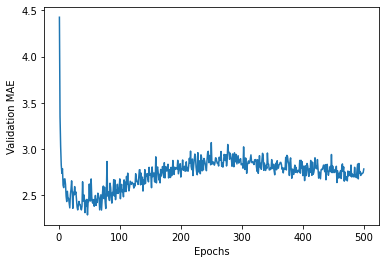

In [ ]:
# Plotting all the validation scores
import matplotlib.pyplot as plt
# Plot the average MAE for each epoch
plt.plot(range(1, len(scalling_model_average_mae_history) + 1), scalling_model_average_mae_history)

# Axes labbels
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Due to the enourmous amount of epochs needed to overfit, isnt clear what is the optimal number of epochs. For that reason, I will remove the first 10 MAE values so that readibility is improved.

On top of that, I will use a smoothing function.

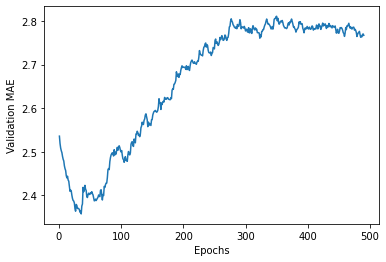

In [ ]:
# Plotting validation scores, excluding the first 10 data points for clarity
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

# Smoothing the points to make it more readable
smooth_mae_history = smooth_curve(second_model_average_mae_history[10:])

#new update graph
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Netx, I will find the minimum value so that is clear when will the validation degrade for the lower the validation loss, the better the model is.

In [ ]:
num_epochs = np.argmin(smooth_mae_history)
print('Optimal number of epochs: ', num_epochs)

Optimal number of epochs:  35


In [ ]:
# Optimal number of epochs model
epochs_model_all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)

  model = build_model()
  # Train the model (in silent mode, verbose=0)
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
  # Evaluate the model on the validation datam
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  epochs_model_all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
epochs_model_all_scores = np.mean(epochs_model_all_scores)
print('Optimal epochs model MAE: ', epochs_model_all_scores)
print('Previous model MAE: ', first_model_mae)
print('MAE decrease: ', first_model_mae - epochs_model_all_scores)
print('----------------------------------------------------------------------------')

Optimal epochs model MAE:  2.443190336227417
Previous model MAE:  2.3549145460128784
MAE decrease:  -0.08827579021453857
----------------------------------------------------------------------------


The optimal number of epochs for this model build is 35. From the code above is clear that with the use of the optimal number of epochs, the model's MAE decreased, therefore improving the current model comparing to the first model.

The next step is to regularize and tune the model to find the optimal configuration and so reach best deep learning model possible.

### **Part 7: Regularizing and tuning**

In the last part of the universal workflow

####  **Adding weight regularization**






In the last part of the universal workflow, I will regularize and tune the model. By changing the models’ hyperparameters and analyse its subsequent change in performance I will be able to identify the best configuration among the hyperparameters chosen, using the MAE as a validation aspect.

Before tuning the model, it needs to be regularized. This process fights overfitting through the application of measures such as adding more data, network size reduction, weight regularization and adding dropout. I chose to add weight regularization which consists in putting limits on the complexity of a network by forcing its weights to only admit small values. I will experiment L1 and L2 regularization in turns and then altogether. This is added by passing weight regularizer instances to layers as keyword arguments [2].


##### **L1 Model**

In [ ]:
from keras import regularizers

# build the third model adding L1 regularizer
def build_l1model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

l1_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_l1model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    l1_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
l1_model_all_scores = np.mean(l1_model_all_scores)
print('L1 model with weight regularization MAE: ', l1_model_all_scores)
print('MAE decreased from first model by: ', (first_model_mae - l1_model_all_scores))
print('----------------------------------------------------------------------------')

L1 model with weight regularization MAE:  2.489901840686798
MAE decreased from first model by:  -0.13498729467391968
----------------------------------------------------------------------------


Comparing the first MAE value of weight regularization with the MAE value from the first model, it is clear that the MAE value got worse which means that L1 is not an improvement when compared to the first model built here.

##### **L2 Model**

In [ ]:
# build the fourth model adding L2 regularizer
def build_l2model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

l2_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_l2model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    l2_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
l2_model_all_scores = np.mean(l2_model_all_scores)
print('L2 model with weight regularization MAE: ',l2_model_all_scores)
print('MAE decreased from first model by: ', (first_model_mae - l2_model_all_scores))
print('----------------------------------------------------------------------------')

L2 model with weight regularization MAE:  2.267015188932419
MAE decreased from first model by:  0.0878993570804596
----------------------------------------------------------------------------


Contrary to L1 MAE value, the code above shows that L2 weight regularization does improve the MAE value when compared to the first model built.

##### **L1+L2 Model**

In [ ]:
 # build the fifth model adding L1+L2 regularizers
def build_l1l2model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

l1l2_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_l1l2model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    l1l2_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
l1l2_model_all_scores = np.mean(l1l2_model_all_scores)
print('L1+L2 model with weight regularization MAE: ',l1l2_model_all_scores)
print('MAE decreased from first model by: ', (first_model_mae - l1l2_model_all_scores))
print('----------------------------------------------------------------------------')

L1+L2 model with weight regularization MAE:  2.4330516159534454
MAE decreased from first model by:  -0.07813706994056702
----------------------------------------------------------------------------


After a escalation with L1 and a depreciation with L2, the third weigh regularization combined the use of L1 and L2 which translated in a growth of 0.078 when compared to the first model built. Still better than L1 but a growth none the less. It it important to remember that the lower the MAE value, the better.

Having tried the three types of weight regularizers, I will compare the three results and identify the optimal regularizer.

##### **Weight regularization comparison**

In [ ]:
print('L1 Model MAE:    ',l1_model_all_scores)
print('L2 Model MAE:    ',l2_model_all_scores)
print('L1+L2 Model MAE: ',l1l2_model_all_scores)
print('----------------------------------------------------------------------------')

L1 Model MAE:     2.489901840686798
L2 Model MAE:     2.267015188932419
L1+L2 Model MAE:  2.4330516159534454
----------------------------------------------------------------------------


From the code above, it is clear that the L2 weight regularization produced the lowest MAE, hence the best model so far.

#### **Tuning the type of optimizer**




When training a neural network, its weights are initially randomly initialized only to be then updated in each epoch. [4] This way they increase the overall accuracy of the network. The optimizer job is to specify the exact way in which the gradient of the loss will be used to update the parameters. Through the correct regulation on the weights update, the optimizer makes sure that accuracy will be as high as possible. 

There are 8 different types of optimizer, and I will use three of them as measuring tool to improve the model viability: Rmsprop, Adam and Adadelta. I will then calculate the mean MAE for each optimizer and use that value as validation on the most efficient optimizer.
[3] 

##### **Opt1 Model**

As first choice of optimizer, I will use Rmsprop which is the default optimizer. This way the MAE value produced will work as a base value and all the other will compare to this first option. 

In [ ]:
# build the optimizer 1 model
def build_opt1_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Optimizer Rmsprop
  return model

opt1_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_opt1_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    opt1_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
opt1_model_all_scores = np.mean(opt1_model_all_scores)
print('Opt1 model MAE: ',opt1_model_all_scores)
print('----------------------------------------------------------------------------')

Opt1 model MAE:  2.4154313504695892
----------------------------------------------------------------------------


##### **Opt2 Model**

In [ ]:
# build the optimizer 2 model
def build_opt2_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])# Optimizer Adam
  return model

opt2_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_opt2_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    opt2_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
opt2_model_all_scores = np.mean(opt2_model_all_scores)
print('Opt2 model MAE: ',opt2_model_all_scores)
print('----------------------------------------------------------------------------')

Opt2 model MAE:  2.4089295566082
----------------------------------------------------------------------------


##### **Opt3 Model**

In [ ]:
# build the optimizer 3 model
def build_opt3_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='adadelta', loss='mse', metrics=['mae'])# Optimizer Adadelta
  return model

opt3_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_opt3_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    opt3_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
opt3_model_all_scores = np.mean(opt3_model_all_scores)
print('Opt3 model MAE: ',opt3_model_all_scores)
print('----------------------------------------------------------------------------')

Opt3 model MAE:  22.20896339416504
----------------------------------------------------------------------------


##### **Optimizer comparison**

In [ ]:
print('Opt1 Model MAE: ',opt1_model_all_scores)
print('Opt2 Model MAE: ',opt2_model_all_scores)
print('Opt3 Model MAE: ',opt3_model_all_scores)
print('----------------------------------------------------------------------------')

Opt1 Model MAE:  2.4154313504695892
Opt2 Model MAE:  2.4089295566082
Opt3 Model MAE:  22.20896339416504
----------------------------------------------------------------------------


Analysing the three outputs of the three chosen different optimizers, is perceptible that optimizer Adadelta breaks the limit of all the others MAEs whilst Rmsprop and Adam barely can be distinguished for their MAE value differ less than 0.1. It is clear then that Adam is the best option.

#### **Tuning the learning rate**

The last hyperparameter to be tuned is learning rate. This step is how much the weights are updated during training. 

Learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. It controls how quickly the model adapts.

Sudden changes in the learning rate can cause the model to converge too quickly to a non ideal solution, so my tuning will be cautious. 
I will start with 0.001, the lowest of the three values that I will put to test.


##### **LR1 Model**

In [ ]:
from tensorflow.keras import optimizers

# build the learning rate 1 model
def build_lr1_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'mse', metrics = ['mae'])
  return model

lr1_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_lr1_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    lr1_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
lr1_model_all_scores = np.mean(lr1_model_all_scores)
print('LR1 model MAE: ',lr1_model_all_scores)
print('----------------------------------------------------------------------------')

LR1 model MAE:  2.3689284920692444
----------------------------------------------------------------------------


Straight away, learning rate 0.001 reached one of the lowest MAE values so far.

##### **LR2 Model**

In [ ]:
# build the learning rate 2 model
def build_lr2_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.Adam(learning_rate = 0.005), loss = 'mse', metrics = ['mae'])
  return model

lr2_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_lr2_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    lr2_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
lr2_model_all_scores = np.mean(lr2_model_all_scores)
print('LR1 model MAE: ',lr2_model_all_scores)
print('----------------------------------------------------------------------------')

LR1 model MAE:  2.5668163895606995
----------------------------------------------------------------------------


#####**LR3 Model**

In [ ]:
# build the learning rate 3 model
def build_lr3_model():
  model = models.Sequential()
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.Adam(learning_rate = 0.01), loss = 'mse', metrics = ['mae'])
  return model

lr3_model_all_scores = []

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    # Build the Keras model (already compiled)
    model = build_lr2_model()
    
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation datam
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    lr3_model_all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [ ]:
lr3_model_all_scores = np.mean(lr3_model_all_scores)
print('LR3 model MAE: ',lr3_model_all_scores)
print('----------------------------------------------------------------------------')

LR1 model MAE:  2.5154531598091125
----------------------------------------------------------------------------


##### **Learning rate comparison**

In [ ]:
print('LR1 Model MAE: ',lr1_model_all_scores)
print('LR2 Model MAE: ',lr2_model_all_scores)
print('LR3 Model MAE: ',lr3_model_all_scores)
print('----------------------------------------------------------------------------')

LR1 Model MAE:  2.3689284920692444
LR2 Model MAE:  2.5668163895606995
LR3 Model MAE:  2.5154531598091125
----------------------------------------------------------------------------


Comparing the three MAE value for different rates, becomes clear that the lowest value actually reach one of the lowest MAE value of all the models whereas the higher learning rates, go above the average MAE value of 2.42.

## **Results**

The following table condense all the models and respective configurations run in this coursework: 

| Model Number  | Model Name  | Weight regularization  | Type of Optimizer  |  Learning Rate | MAE (3 d.p.) |
| ------------ | ------------ | ------------ | ------------ | ------------ | ------------ |
|  N/A | baseline  | N/A  | N/A  |  N/A | 6.648  |
| 1  | first_model |  Default |Default|Default|  2.355 |
|  2 | epochs_model  | Default  | Default  | Default  | 2.443  |
|  3 | l1_model  |  L1 (0.001) | Default  | Default  | 2.490  |
|  4 | l2_model  | L2 (0.001) | Default  | Default  | 2.267  |
|  5 | l1l2_model   | L1+L2 (0.001 each) | Default  | Default  | 2.433  |
| 6  | opt1_model  | L2  |Rmsprop| Default  | 2.415  |
|  7 | opt2_model  | L2  | Adam  | Default  | 2.409  |
|  8 | opt3_model  | L2  | Adadelta  | Default  | 22.209  |
| 9  | lr1_model  | L2  | Adam  | 0.001  |2.369   |
|  10 |lr2_model| L2  | Adam  |  0.005 |  2.567 |
| 11  | lr3_model  | L2  | Adam  | 0.01  |  2.515 |




The following table condense all the models and respective configurations run in this coursework: 


A thorough scrutiny of the information present in the table, allows to conclude that:


*  The first model has nearly 3 times more accuracy than the baseline.

*  The optimal weight regularization is L2 at 0.001, with a MAE of 2.267.

*  The optimal optimizer is Adam, with a MAE of 2.409.

*  The optimal learning rate is 0.001, with a MAE of 2.369.

*  There is an amplitude of 19.942 between the lowest and the highest MAE.

From all the 11 models built, the "l2_model" proved to be the best model for this problem hence I will use it’s configuration for my final model.


### **Final model**

Following the evaluation of the result table in the previous section, I will built my model with the following configuration:


*   35 Epochs.
*   Weight regularization of L2 (0.001).
*   Default optimizer.
*   Default learning rate.





In [ ]:
from keras import regularizers
from keras import models
from keras import layers

# build the final model
model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model (in silent mode, verbose=0)
model.fit(train_data, train_targets, epochs=35, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('Score: ', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 15.3148 - mae: 2.4583
Score:  2.4583396911621094


##**Conclusion**




This was my first incursion into deep learning and, while using information provided by the book and the module teacher was relatively easy, the vast and varied possibilities provided by Machine Learning models make me consider that it is far more complex, comprehensive and with more applications that I know for now. From the extensive number of models built, I can conclude that L2 weigh regularization is the hyperparameter that better tunes down the MAE value, right after to learning rate 0.001 mixed with Adam optimizer, therefore this is something that I will use in the future. This type of information is only possible due to the experiments provided by this coursework.
Looking closely to the table of results, the mean MAE is 2.4263, excluding the baseline and opt3_model which clearly pushed the scale up.

So, the MAE of 2.4583 obtained by the final model makes me accept that it sits close to the average of all the other models. This also means that, although tuning the hyperparameters provided big changes in the output for some configurations, in the end the final model sits just by the mean average MAE value. Additionally, the final MAE shows a decreased of the baseline from 6.648 to 2.4583 proving that the scalar regression problem is possible of prediction despite the small dataset present.

In conclusion, I believe that this coursework proved that the hypothesis were right: this deep learning model can predict the median price of a house in that area/time and the data points provided by Boston Housing dataset proved to be enough to allow the model to learning the relationship between input and output while achieving the first hypothesis point.


## References

[1] Chollet, F., 2018. Deep Learning with Python. 2nd ed. Manning Publications Co., pp.111 - 117.

[2] Chollet, F., 2018. Deep Learning with Python. 2nd ed. Manning Publications Co.

[3] Team, K., 2021. Keras documentation: Optimizers. [online] Keras.io. Available at: <https://keras.io/api/optimizers/> [Accessed 20 November 2021].

[4] Sharma, P., 2020. Keras Optimizers Explained with Examples for Beginners - MLK - Machine Learning Knowledge. [online] MLK - Machine Learning Knowledge. Available at: <https://machinelearningknowledge.ai/keras-optimizers-explained-with-examples-for-beginners/#Comparison_of_Optimizers> [Accessed 20 November 2021].

[Fig. 01] Disci, S., 2021. Simulated Neural Network with Bootstrapping Time Series Data | R-bloggers. [online] R-bloggers. Available at: <https://www.r-bloggers.com/2021/06/simulated-neural-network-with-bootstrapping-time-series-data/> [Accessed 18 November 2021].

[5] Brownlee, J., 2018. A Gentle Introduction to k-fold Cross-Validation. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/k-fold-cross-validation/> [Accessed 18 November 2021].